# Hypothesis 3: Attorney Involvement and technologically advanced states
- We hypothesize that patents filed with attorney organizations involvement are more likely to originate from tech-centric states. 
- In contrast, patents without attorney organization involvement may show more geographic spread in rural origin.
- Datasets used here: ai_model_predictions.csv, g+inventor_disambiguated.tsv, g+location_disambiguated.tsv, g_application.tsv, g_attorney_disambiguates.tsv
- Several statistical calculations and charts/visualizations are used to consider the valididty of the hypothesis

- Used references from ChatGPT and Stack Overflow along with some documentations like [https://seaborn.pydata.org/tutorial/function_overview.html] and [https://stackoverflow.com/questions/67311868/finding-top-n-based-on-a-column-in-dataframe-and-lumping-the-rest-into-others] and [https://www.geeksforgeeks.org/get-topmost-n-records-within-each-group-of-a-pandas-dataframe/] and [https://stackoverflow.com/questions/23539832/how-to-calculate-percentage-with-pandas-dataframe] and [https://plotly.com/python/choropleth-maps/] and [https://towardsdatascience.com/choropleth-maps-with-pandas-and-flourish-aea2ad9ec5e3/] and [https://medium.com/data-science/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d]    


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import seaborn as sns
from scipy.stats import zscore


# Import Files
- All files have been imported in the /Data folder using the ai_patent_download.py python notebook code.

In [3]:
ai_df = pd.read_csv("Data/ai_model_predictions.csv")
attorney_df = pd.read_csv("Data/g_attorney_disambiguated.tsv", sep="\t")
location_df = pd.read_csv("Data/g_location_disambiguated.tsv", sep="\t")
application_df = pd.read_csv("Data/g_application.tsv", sep="\t")
inventor_df = pd.read_csv("Data/g_inventor_disambiguated.tsv", sep="\t")

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_68758/2313919994.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ai_df = pd.read_csv("Data/ai_model_predictions.csv")
/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_68758/2313919994.py:4: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application_df = pd.read_csv("Data/g_application.tsv", sep="\t")


In [4]:
ai_df.columns

Index(['doc_id', 'flag_patent', 'pub_dt', 'appl_id', 'predict50_any_ai',
       'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml',
       'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo',
       'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp',
       'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech',
       'predict93_speech', 'ai_score_speech', 'predict50_vision',
       'predict86_vision', 'predict93_vision', 'ai_score_vision',
       'predict50_planning', 'predict86_planning', 'predict93_planning',
       'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr',
       'ai_score_kr', 'predict50_hardware', 'predict86_hardware',
       'predict93_hardware', 'ai_score_hardware'],
      dtype='object')

In [5]:
ai_df["pub_dt"] = pd.to_datetime(ai_df["pub_dt"])
ai_df["year"] = ai_df["pub_dt"].dt.year

In [6]:
merged_df = pd.merge(ai_df, application_df, left_on='appl_id', right_on='application_id', how='left')
merged_df[-5:]
merged_df.drop(columns=['appl_id'], inplace=True)
merged_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,predict86_hardware,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0,0,0.001062,2018,14643719,10000000,14,2015-03-10,14,0.0
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0,0,0.000073,2018,14962323,10000001,14,2015-12-08,14,0.0
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0,0,0.000369,2018,15107519,10000002,15,2014-12-30,15,0.0
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,0,0,0.000518,2018,14437961,10000003,14,2013-03-12,14,0.0
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,0,0,0.000068,2018,14973198,10000004,14,2015-12-17,14,0.0


In [7]:
#merge for getting location_id in this merged dataset using the inventor dataset
new_df = pd.merge(merged_df, attorney_df, on='patent_id', how='left')
new_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,patent_application_type,filing_date,series_code,rule_47_flag,attorney_sequence,attorney_id,disambig_attorney_name_first,disambig_attorney_name_last,disambig_attorney_organization,attorney_country
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,14,2015-03-10,14,0.0,0.0,b3c98f20e3e28fd54083915ad978353c,NaN,NaN,"Munck Wilson Mandala, LLP",NaN
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,14,2015-12-08,14,0.0,0.0,e6f577eb0680dac0003c00a6ed8806c0,NaN,NaN,K&L Gates LLP,NaN
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,15,2014-12-30,15,0.0,0.0,1841e0cfc9cd02b68b0ec6269adda229,NaN,NaN,"Lex IP Meister, PLLC",NaN
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,14,2013-03-12,14,0.0,0.0,380f74ad81a6fdf6e937ad2352257058,NaN,NaN,"Grossman, Tucker, Perreault & Pfleger, PLLC",NaN
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,14,2015-12-17,14,0.0,0.0,0c34dbbb2964ace1b1b5ebad6bd09a54,NaN,NaN,"Defillo & Associates, Inc.",NaN


In [8]:
new_df.columns

Index(['doc_id', 'flag_patent', 'pub_dt', 'predict50_any_ai',
       'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml',
       'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo',
       'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp',
       'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech',
       'predict93_speech', 'ai_score_speech', 'predict50_vision',
       'predict86_vision', 'predict93_vision', 'ai_score_vision',
       'predict50_planning', 'predict86_planning', 'predict93_planning',
       'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr',
       'ai_score_kr', 'predict50_hardware', 'predict86_hardware',
       'predict93_hardware', 'ai_score_hardware', 'year', 'application_id',
       'patent_id', 'patent_application_type', 'filing_date', 'series_code',
       'rule_47_flag', 'attorney_sequence', 'attorney_id',
       'disambig_attorney_name_first', 'disambig_attorney_name_last',
    

In [9]:
df = new_df

In [10]:
check = df[df['year'] == 2018]
check


,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,patent_application_type,filing_date,series_code,rule_47_flag,attorney_sequence,attorney_id,disambig_attorney_name_first,disambig_attorney_name_last,disambig_attorney_organization,attorney_country
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,14,2015-03-10,14,0.0,0.0,b3c98f20e3e28fd54083915ad978353c,NaN,NaN,"Munck Wilson Mandala, LLP",NaN
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,14,2015-12-08,14,0.0,0.0,e6f577eb0680dac0003c00a6ed8806c0,NaN,NaN,K&L Gates LLP,NaN
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,15,2014-12-30,15,0.0,0.0,1841e0cfc9cd02b68b0ec6269adda229,NaN,NaN,"Lex IP Meister, PLLC",NaN
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,14,2013-03-12,14,0.0,0.0,380f74ad81a6fdf6e937ad2352257058,NaN,NaN,"Grossman, Tucker, Perreault & Pfleger, PLLC",NaN
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,14,2015-12-17,14,0.0,0.0,0c34dbbb2964ace1b1b5ebad6bd09a54,NaN,NaN,"Defillo & Associates, Inc.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780820,RE47180,1,2018-12-25,0,0,0,0,0,0,0.000134,...,15,2016-11-02,15,0.0,1.0,4b2be3bd4001a8fb69c5aa79c904cb52,Michael A.,Glenn,NaN,NaN
17780821,RE47180,1,2018-12-25,0,0,0,0,0,0,0.000134,...,15,2016-11-02,15,0.0,0.0,5b244d5a5242cbce914c9917814efdb9,NaN,NaN,Perkins Coie LLP,NaN
17780822,RE47181,1,2018-12-25,0,0,0,0,0,0,0.000399,...,15,2016-02-04,15,0.0,0.0,8cdfc20c7a4ef6e2bc1cd3a3cd816022,NaN,NaN,"Birch, Stewart, Kolasch & Birch, LLP",NaN
17780823,RE47182,1,2018-12-25,0,0,0,0,0,0,0.000291,...,14,2015-12-30,14,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
check['disambig_attorney_organization'].notna().sum()


515039

In [12]:
df['has_attorney'] = ~df['disambig_attorney_organization'].isna()



# Top 5 Patent Attorneys Worldwide

This code identifies which attorney organizations are most frequently listed on patent filings globally:

1. Filter out patents without an attorney  
   We define `df_no_attorney` to represent records lacking attorney data (`has_attorney == False`).  
2. Count attorney occurrences  
   We use `value_counts()` on the `disambig_attorney_organization` column of the attorney-filtered DataFrame (`df_attorney`) to tally how many patents each organization handled.  
3. Select the top 5  
   The `.head(5)` method retrieves the five organizations with the highest patent counts.  
4. Format and display results  
   We reset the index and rename columns for clarity, then print a numbered list of the top five attorney organizations alongside their patent counts.


In [13]:
df_attorney = df[df['has_attorney']]
#df_attorney[df_attorney['year'] == 2000]
#thos proves that the rows were just not sorted but the table has values for all

In [14]:
df_no_attorney = df[~df['has_attorney']]


In [15]:
top_attorneys = (
    df_attorney['disambig_attorney_organization']
    .value_counts()
    .head(5)
    .reset_index()
)
top_attorneys.columns = ['attorney_organization', 'patent_count']

In [16]:
top_5_names = top_attorneys['attorney_organization']
print("Top 5 Most Popular Attorneys by Patent Count Worldwide:\n")
for idx, row in top_attorneys.iterrows():
    print(f"{idx+1}. {row['attorney_organization']} — {row['patent_count']} patents")

Top 5 Most Popular Attorneys by Patent Count Worldwide:

1. Sughrue Mion, PLLC — 157541 patents
2. Birch, Stewart, Kolasch & Birch, LLP — 119657 patents
3. Fish & Richardson P.C. — 117477 patents
4. Oblon, McClelland, Maier & Neustadt, L.L.P. — 92151 patents
5. Harness, Dickey & Pierce, P.L.C. — 87949 patents


# State-Wise Patent Distribution of Top 5 Attorney Organizations

After identifying the top 5 attorney organizations worldwide, this section explores **how their patent filings are distributed across U.S. states**. By grouping data by both attorney and state, we can uncover geographic patterns in patents.


In [17]:
top_5_attorney_patents = df_attorney[
    df_attorney['disambig_attorney_organization'].isin(top_5_names)
]

In [18]:
merged_investor_df = pd.merge(top_5_attorney_patents, inventor_df, on = 'patent_id', how='left')

In [19]:
merged_loc_df = pd.merge(
    merged_investor_df,
    location_df[location_df['disambig_country'] == 'US'],
    on='location_id',
    how='left'
)

In [20]:
attorney_state_counts = (
    merged_loc_df.groupby(['disambig_attorney_organization', 'disambig_state'])
    .size()
    .reset_index(name='patent_count')
)

In [21]:
attorney_state_counts

,disambig_attorney_organization,disambig_state,patent_count
0,"Birch, Stewart, Kolasch & Birch, LLP",AL,21
1,"Birch, Stewart, Kolasch & Birch, LLP",AR,8
2,"Birch, Stewart, Kolasch & Birch, LLP",AZ,53
3,"Birch, Stewart, Kolasch & Birch, LLP",CA,1809
4,"Birch, Stewart, Kolasch & Birch, LLP",CO,46
...,...,...,...
246,"Sughrue Mion, PLLC",VT,146
247,"Sughrue Mion, PLLC",WA,418
248,"Sughrue Mion, PLLC",WI,66
249,"Sughrue Mion, PLLC",WV,26


# Yearly Patent Filing Trends by Top 5 Attorney Organizations

This visualization shows how patent filings have evolved over time for the **top 5 attorney organizations**. By grouping patent counts by both year and attorney, we can observe which firms have remained consistently active, which ones have grown post-COVID, and whether any shifts in dominance have occurred.

The bar chart uses color-coded bars to compare yearly filing volumes for each organization, helping highlight trends such as rapid growth, stability, or decline in their patent activity across years.


In [22]:
attorney_state_counts = (
    merged_loc_df
    .groupby(['disambig_attorney_organization', 'disambig_state'])
    .size()
    .reset_index(name='patent_count')
)

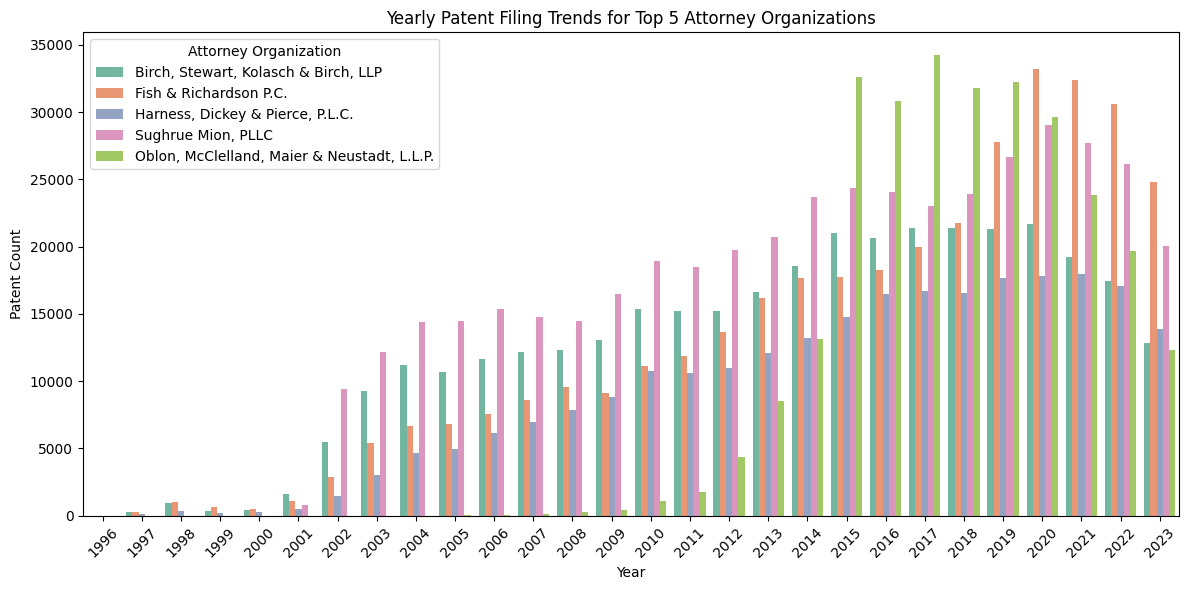

In [23]:
yearly_counts = (
    merged_loc_df
    .groupby(['year', 'disambig_attorney_organization'])
    .size()
    .reset_index(name='patent_count')
)

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_counts,
            x='year',
            y='patent_count',
            hue='disambig_attorney_organization',
            palette='Set2')

plt.title('Yearly Patent Filing Trends for Top 5 Attorney Organizations')
plt.xlabel('Year')
plt.ylabel('Patent Count')
plt.legend(title='Attorney Organization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Patent Volume Diversity Across States

This section highlights the **top 15 U.S. states** by total number of patents filed **with attorney involvement**. In addition to showing the patent count per state.

This analysis gives insight into:
- Which states are the most active in terms of patent generation


In [24]:
state_patent_stats = (
    merged_loc_df.groupby('disambig_state')
    .agg(total_patents=('patent_id', 'count'),
         unique_attorneys=('disambig_attorney_organization', 'nunique'))
    .reset_index()
    .sort_values('total_patents', ascending=False)
)

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_68758/4052101328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_patent_stats.head(15), x='disambig_state', y='total_patents', palette='Blues_d')


TypeError: text() missing 1 required positional argument: 's'

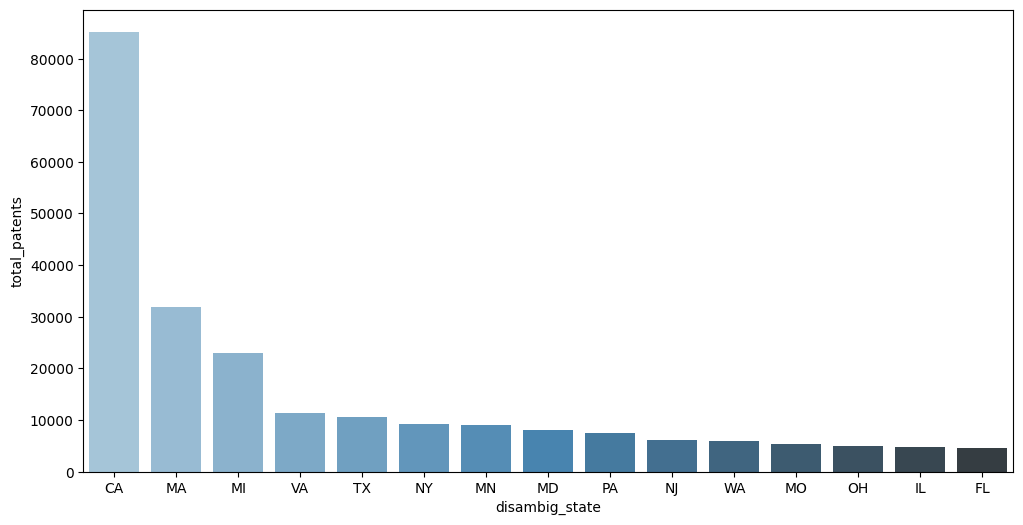

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=state_patent_stats.head(15), x='disambig_state', y='total_patents', palette='Blues_d')

# Annotate with number of attorneys used
for i, row in state_patent_stats.head(15).iterrows():
    plt.text(i, row['total_patents'] + 100,
             ha='center', fontsize=9)

plt.title('Total Patents per State (with Attorney Involvement)')
plt.xlabel('State')
plt.ylabel('Patent Count')
plt.tight_layout()
plt.show()

# Attorney Involvement Rate by State

This section calculates the **percentage of patents filed with attorney involvement** for each U.S. state. By merging total patent counts with those specifically associated with attorney organizations, we compute the **attorney involvement rate** per state.

The choropleth map visualizes these percentages, helping us understand:
- Which states have a high reliance on legal representation in the patent process
- Where self-filed or unaffiliated patent activity is more common

This metric can provide insight into regional differences in patenting practices, access to legal resources, or institutional support.


In [26]:
total_patents = pd.read_csv('Data/total_patents.csv')

In [27]:
total_patents.head() #AS is American Samoa which is a minor island state

,disambig_state,patent_count
0,AK,1930
1,AL,25834
2,AR,13143
3,AS,1
4,AZ,132693


In [28]:
attorney_state_counts = (
    merged_loc_df
    .groupby(['disambig_state'])
    .size()
    .reset_index(name='patent_count_with_atotrney')
)
attorney_state_counts.head()

,disambig_state,patent_count_with_atotrney
0,AK,11
1,AL,936
2,AR,108
3,AZ,2831
4,CA,85242


In [29]:
merged_df = pd.merge(
    total_patents.rename(columns={'patent_count': 'total_patents'}),
    attorney_state_counts.rename(columns={'patent_count': 'patent_count_with_atotrney'}),
    on='disambig_state',
    how='inner'
)

print(merged_df)

   disambig_state  total_patents  patent_count_with_atotrney
0              AK           1930                          11
1              AL          25834                         936
2              AR          13143                         108
3              AZ         132693                        2831
4              CA        2101519                       85242
5              CO         148240                        3446
6              CT         151272                        2977
7              DC           9068                         828
8              DE          27695                        2217
9              FL         183803                        4530
10             GA         118464                        2231
11             HI           5150                          53
12             IA          52159                         494
13             ID          57246                         324
14             IL         293116                        4790
15             IN       

In [30]:
merged_df['attorney_involvement_percent'] = (
    merged_df['patent_count_with_atotrney'] / merged_df['total_patents'] * 100
).round(2)  # Round to 2 decimal places for readability

print(merged_df[['disambig_state', 'attorney_involvement_percent']]
      .sort_values('attorney_involvement_percent', ascending=False))

   disambig_state  attorney_involvement_percent
46             VA                          9.84
7              DC                          9.13
8              DE                          8.01
19             MA                          7.86
24             MO                          7.81
30             NH                          7.63
20             MD                          7.31
22             MI                          7.11
29             NE                          6.91
40             RI                          4.46
4              CA                          4.06
47             VI                          3.85
28             ND                          3.78
23             MN                          3.69
1              AL                          3.62
25             MS                          3.23
43             TN                          3.22
38             PA                          2.85
51             WV                          2.62
21             ME                       

In [31]:
fig = px.choropleth(
    merged_df,
    locations='disambig_state',
    locationmode='USA-states',
    color='attorney_involvement_percent',
    scope='usa',
    color_continuous_scale='Plasma',
    labels={'attorney_involvement_percent': 'Attorney %'},
    title='Attorney Involvement Rate by State'
)
fig.show()

# Top 10 States by Attorney Involvement Rate

This bar chart highlights the **top 10 U.S. states** with the **highest percentage of patents filed with attorney representation**.

Higher attorney involvement may indicate:
- Strong institutional or corporate patent activity
- A focus on complex or high-value patent filings

This visualization complements the choropleth map by focusing on the most attorney-reliant regions in the country.


In [32]:
merged_df['attorney_involvement_percent'] = (
    merged_df['patent_count_with_atotrney'] / merged_df['total_patents'] * 100
)

In [33]:
top_states = merged_df.sort_values('attorney_involvement_percent', ascending=False).head(10)


/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_68758/1965161003.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




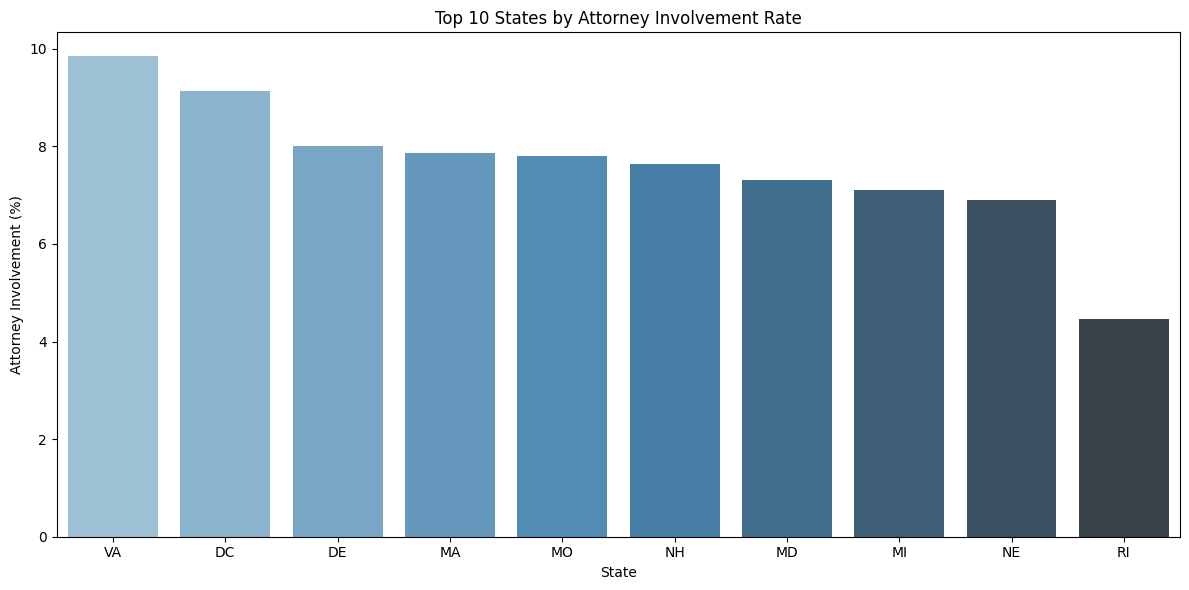

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='disambig_state', y='attorney_involvement_percent', palette='Blues_d')
plt.title('Top 10 States by Attorney Involvement Rate')
plt.xlabel('State')
plt.ylabel('Attorney Involvement (%)')


plt.tight_layout()
plt.show()

In [35]:
df_no_attorney.columns

Index(['doc_id', 'flag_patent', 'pub_dt', 'predict50_any_ai',
       'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml',
       'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo',
       'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp',
       'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech',
       'predict93_speech', 'ai_score_speech', 'predict50_vision',
       'predict86_vision', 'predict93_vision', 'ai_score_vision',
       'predict50_planning', 'predict86_planning', 'predict93_planning',
       'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr',
       'ai_score_kr', 'predict50_hardware', 'predict86_hardware',
       'predict93_hardware', 'ai_score_hardware', 'year', 'application_id',
       'patent_id', 'patent_application_type', 'filing_date', 'series_code',
       'rule_47_flag', 'attorney_sequence', 'attorney_id',
       'disambig_attorney_name_first', 'disambig_attorney_name_last',
    

In [36]:
df_no_attorney.drop(columns = ['predict50_any_ai',
       'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml',
       'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo',
       'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp',
       'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech',
       'predict93_speech', 'ai_score_speech', 'predict50_vision',
       'predict86_vision', 'predict93_vision', 'ai_score_vision',
       'predict50_planning', 'predict86_planning', 'predict93_planning',
       'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr',
       'ai_score_kr', 'predict50_hardware', 'predict86_hardware',
       'predict93_hardware', 'ai_score_hardware'], inplace = True)

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_68758/374366665.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df_no_attorney.head()

,doc_id,flag_patent,pub_dt,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag,attorney_sequence,attorney_id,disambig_attorney_name_first,disambig_attorney_name_last,disambig_attorney_organization,attorney_country,has_attorney
5,10000004,1,2018-06-19,2018,14973198,10000004,14,2015-12-17,14,0.0,1.0,b44752ad3f26c6c7dc7932002cd1563b,Evelyn A.,Defillo,NaN,NaN,False
10,10000009,1,2018-06-19,2018,14614952,10000009,14,2015-02-05,14,0.0,0.0,d21e642f9bb7c290f6027bc948364c34,Thomas,Schneck,NaN,US,False
27,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
30,10000031,1,2018-06-19,2018,14480941,10000031,14,2014-09-09,14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
31,10000032,1,2018-06-19,2018,14110438,10000032,14,2012-04-10,14,0.0,0.0,974bb4f8fe098c942e89822d07878072,Norman B.,Thot,NaN,NaN,False


In [ ]:
merged_investor_df = pd.merge(df_no_attorney, inventor_df, on = 'patent_id', how='left')
#This is to merge with the location dataset later on

In [40]:
merged_loc_df = pd.merge(merged_investor_df, location_df[location_df['disambig_country'] == 'US'], on='location_id', how='left')
merged_loc_df.head()


,doc_id,flag_patent,pub_dt,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag,...,gender_code,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000004,1,2018-06-19,2018,14973198,10000004,14,2015-12-17,14,0.0,...,M,74ce52e1-16c8-11ed-9b5f-1234bde3cd05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000004,1,2018-06-19,2018,14973198,10000004,14,2015-12-17,14,0.0,...,M,74ce52e1-16c8-11ed-9b5f-1234bde3cd05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000009,1,2018-06-19,2018,14614952,10000009,14,2015-02-05,14,0.0,...,M,c6999d14-16c7-11ed-9b5f-1234bde3cd05,Hayward,CA,US,37.668821,-122.080796,Alameda,6.0,1.0
3,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,...,M,d7e118b7-16c7-11ed-9b5f-1234bde3cd05,Inver Grove Heights,MN,US,44.847904,-93.042812,Dakota,27.0,37.0
4,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,...,M,cb5e57a6-16c7-11ed-9b5f-1234bde3cd05,Windom,MN,US,43.866346,-95.116937,Cottonwood,27.0,33.0


In [41]:
df = merged_loc_df[merged_loc_df['disambig_state'].notna()]


In [42]:
df.head()

,doc_id,flag_patent,pub_dt,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag,...,gender_code,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
2,10000009,1,2018-06-19,2018,14614952,10000009,14,2015-02-05,14,0.0,...,M,c6999d14-16c7-11ed-9b5f-1234bde3cd05,Hayward,CA,US,37.668821,-122.080796,Alameda,6.0,1.0
3,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,...,M,d7e118b7-16c7-11ed-9b5f-1234bde3cd05,Inver Grove Heights,MN,US,44.847904,-93.042812,Dakota,27.0,37.0
4,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,...,M,cb5e57a6-16c7-11ed-9b5f-1234bde3cd05,Windom,MN,US,43.866346,-95.116937,Cottonwood,27.0,33.0
5,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,...,M,cc7235d2-16c7-11ed-9b5f-1234bde3cd05,Mendota Heights,MN,US,44.883577,-93.138275,Dakota,27.0,37.0
6,10000028,1,2018-06-19,2018,14422136,10000028,14,2013-08-13,14,0.0,...,M,d1bea169-16c7-11ed-9b5f-1234bde3cd05,Hudson,WI,US,44.975127,-92.755628,St. Croix,55.0,109.0


# Patent Filings Without Attorney Involvement by State

This choropleth map visualizes the number of patents **filed without any attorney involvement** across U.S. states. These filings may reflect:

- Independent inventors or startups without legal support
- Lower-complexity patents

By highlighting where unaffiliated or self-filed patents are more common, this map helps us understand the **regional disparities in legal representation** during the patenting process.


In [43]:
no_attorney_state_counts = (
    df
    .groupby(['disambig_state'])
    .size()
    .reset_index(name='patent_count_without_atotrney')
)
no_attorney_state_counts.head()

,disambig_state,patent_count_without_atotrney
0,AK,1974
1,AL,27369
2,AR,11939
3,AS,1
4,AZ,122427


In [44]:
fig = px.choropleth(
    no_attorney_state_counts,
    locations='disambig_state',
    locationmode='USA-states',
    color='patent_count_without_atotrney',
    scope='usa',
    color_continuous_scale='Reds',
    title='Patent Filings Without Attorney Involvement by State'
)

fig.show()

# Trend of Patents Filed Without Attorney Involvement (Over Years)

This line chart visualizes the **yearly trend** of patent filings submitted **without attorney representation**. By calculating the total number of such filings and comparing it against all filings each year, we can observe:

- Whether self-filed patents are increasing or decreasing over time
- The potential impact of policy changes, cost, or access to legal services
- Shifts in the behavior of individual inventors or startups post-COVID

The chart also prepares a secondary variable (`percent_change`) to quantify the year-over-year change in the percentage of no-attorney filings.


In [45]:
non_attorney_yearly = df.groupby('year').size().reset_index(name='no_attorney_count')
total_yearly = new_df.groupby('year').size().reset_index(name='total_count')

merged = pd.merge(non_attorney_yearly, total_yearly, on='year')
merged['no_attorney_percent'] = (merged['no_attorney_count'] / merged['total_count']) * 100
merged['percent_change'] = merged['no_attorney_percent'].pct_change() * 100


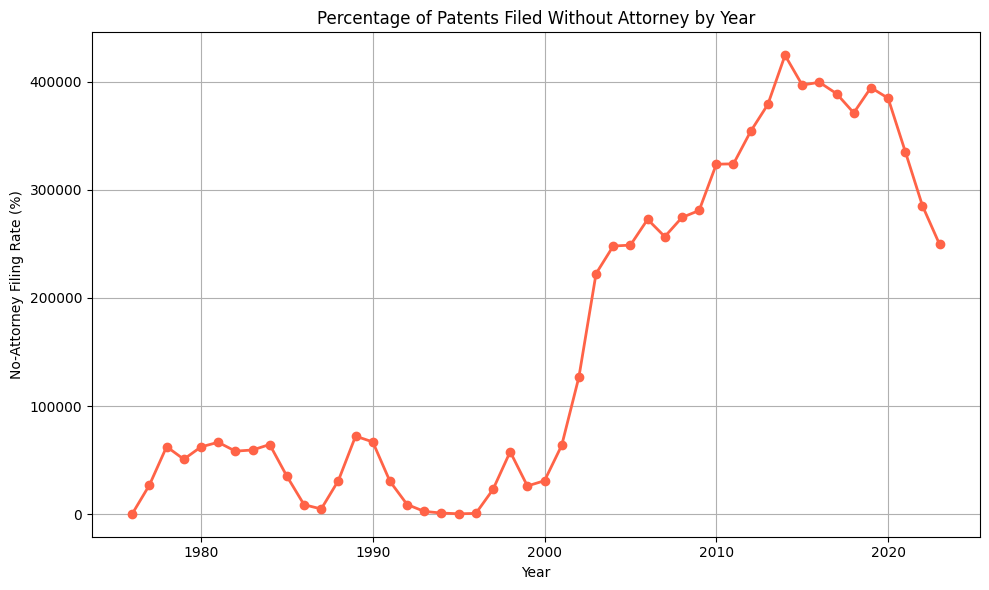

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged['year'], merged['no_attorney_count'], marker='o', linewidth=2, color='tomato')
plt.title('Number of Patents Filed Without Attorney by Year')
plt.xlabel('Year')
plt.ylabel('No-Attorney Filing Number')
plt.grid(True)


plt.tight_layout()
plt.show()

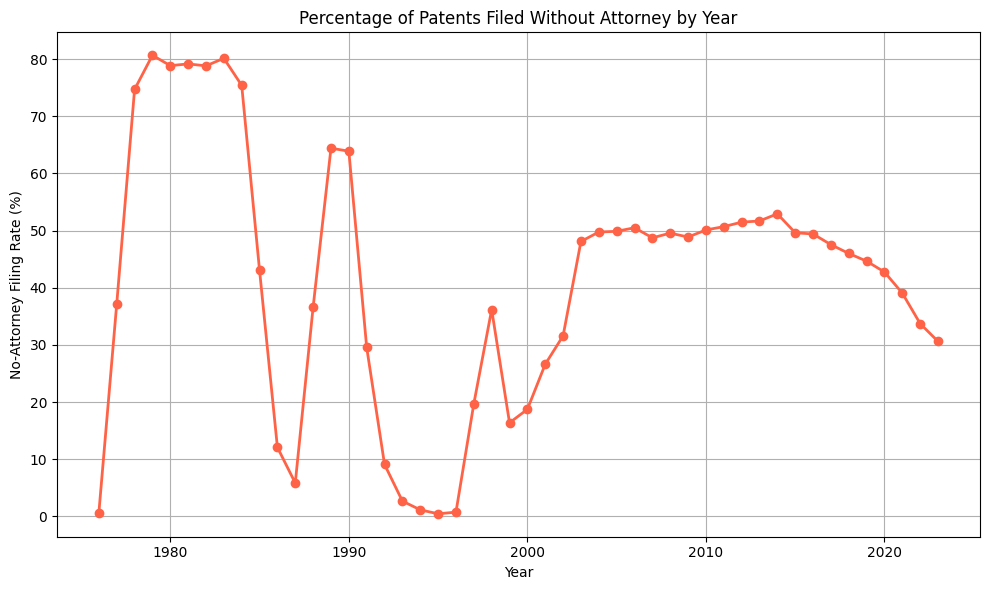

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(merged['year'], merged['no_attorney_percent'], marker='o', linewidth=2, color='tomato')
plt.title('Percentage of Patents Filed Without Attorney by Year')
plt.xlabel('Year')
plt.ylabel('No-Attorney Filing Rate (%)')
plt.grid(True)


plt.tight_layout()
plt.show()

# Top 10 States by Growth in Non-Attorney Patent Filings (2010–2023)

In this section, we analyze the **long-term growth** of patent filings submitted without attorney representation. The workflow involves:

1. **Aggregating total and no-attorney patents per state**
2. **Creating a pivot table** to view yearly trends in patent counts by state
3. **Calculating percent change** in non-attorney filings between 2010 and 2023
4. **Identifying the top 10 states** with the highest increase in these filings

The resulting bar chart highlights states with rising trends in independent or unaided patent activity—often signaling increased grassroots innovation or reduced access to legal resources.


In [48]:
state_total = df.groupby('disambig_state').size().reset_index(name='total_patents')
state_no_attorney = df.groupby('disambig_state').size().reset_index(name='no_attorney_patents')

merged_state = pd.merge(state_total, state_no_attorney, on='disambig_state')
merged_state['no_attorney_rate'] = (merged_state['no_attorney_patents'] / merged_state['total_patents']) * 100


In [49]:
state_year_counts = df.groupby(['disambig_state', 'year']).size().reset_index(name='count')


In [50]:
pivot_df = state_year_counts.pivot(index='disambig_state', columns='year', values='count').fillna(0)
pivot_df.head()

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
disambig_state,,,,,,,,,,,,,,,,,,,,,
AK,0.0,12.0,9.0,11.0,14.0,14.0,15.0,19.0,10.0,11.0,...,71.0,59.0,121.0,153.0,91.0,121.0,94.0,73.0,91.0,49.0
AL,4.0,186.0,416.0,381.0,384.0,415.0,316.0,362.0,408.0,247.0,...,1383.0,1042.0,1314.0,1279.0,1125.0,1296.0,1360.0,1303.0,896.0,924.0
AR,0.0,35.0,64.0,63.0,71.0,57.0,61.0,60.0,56.0,20.0,...,513.0,513.0,535.0,707.0,864.0,1123.0,843.0,772.0,602.0,535.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,1.0,208.0,657.0,462.0,638.0,701.0,602.0,789.0,677.0,530.0,...,5929.0,5460.0,6149.0,6221.0,6204.0,6813.0,6765.0,5955.0,4424.0,3978.0


In [51]:
if 2010 in pivot_df.columns and 2023 in pivot_df.columns:
    pivot_df['percent_change_2010_2023'] = (
        (pivot_df[2023] - pivot_df[2010]) / pivot_df[2010].replace(0, 1) * 100
    )
else:
    print("Ensure your dataset includes both 2010 and 2023.")

In [52]:
top_states = pivot_df.sort_values('percent_change_2010_2023', ascending=False).head(10).reset_index()


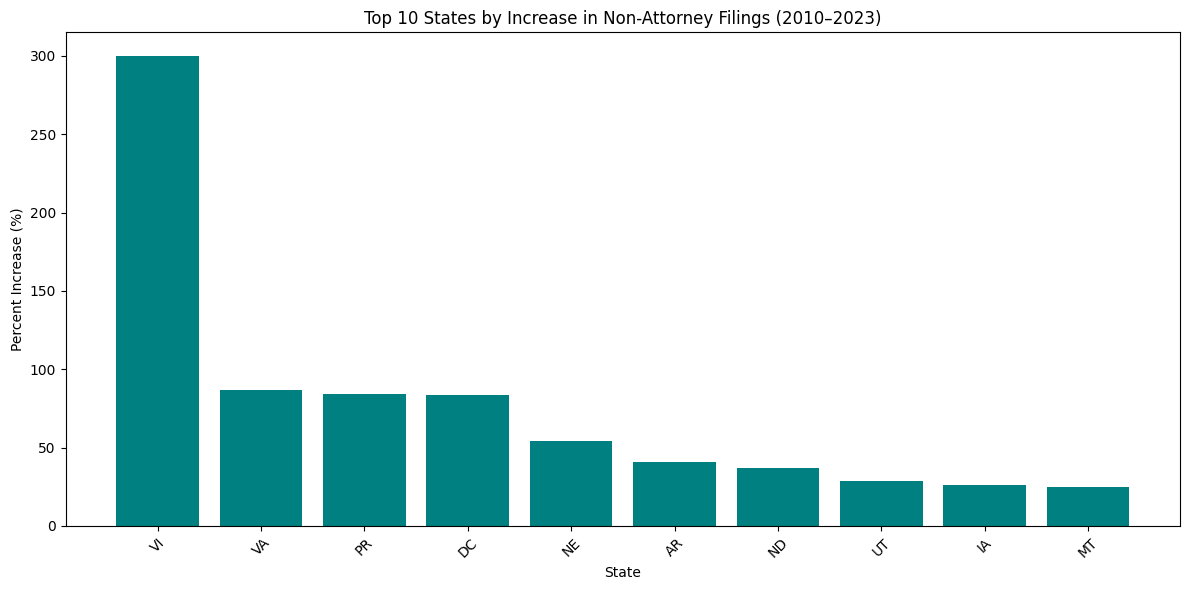

In [53]:
plt.figure(figsize=(12, 6))
plt.bar(top_states['disambig_state'], top_states['percent_change_2010_2023'], color='teal')
plt.title('Top 10 States by Increase in Non-Attorney Filings (2010–2023)')
plt.xlabel('State')
plt.ylabel('Percent Increase (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()